<a href="https://colab.research.google.com/github/ShabanNM/ShabanNM/blob/main/classification_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name**: ***Shaban Mohamed Namatsi***
<br><br>

ID: USER1296211/ R2105D12296211


In [1]:
import numpy as np
import matplotlib.pyplot as plt
# Import PyTorch Library, nn Neural netwroks and transform for transforming data
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
# deep learning libraries
import keras
from keras.datasets import cifar10 as dsets
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, load_model, model_from_json

%matplotlib inline

Get CIFAR-10 Data trainset of 50,000 images train data and 10,000 images as test data.




In [2]:
batch_size = 6
# First the image is resized then converted to a tensor
composed = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,download=True, transform=composed)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,download=True, transform=composed)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')
len(trainset), len(testset)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


(50000, 10000)

To view sample of CIFAR images for instance 50 and 30 Train and test dataset execute 

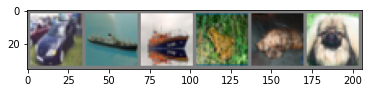

car   ship  ship  frog  dog   dog  


In [3]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

Creating a CNN class. The class for our logistic regression model inherits from the nn.Module class from PyTorch library and has a construcotr to initialize itself.<br>
Additionally, the CNN class has **forward** function  that takes an image as an input and makes a prediction on which label it thinks is the right one. After image input through all the convolutional, max pool layers (**nn.Conv2d() and nn.MaxPool2d()**) and  using the relu activation functionto convert the image input from the 3-D input it received into a 1-D vector which the linear layers can work with. Lastly, the last layer uses softmax function that has Cross entropy loss to get a probability distribution for the predictions which image it is.<br>
After declaration, Instantiate the CNN class as **net**.

In [4]:
import torch.nn.functional as F
class CNN(nn.Module):
    # Contructor
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net=CNN()

**Define a loss function and optimizer:** This is done using a classification Cross-Entropy loss and Stochastic Gradient Descent(SGD) with momentum.
<br>

**Training** of the model using learning rate of 0.001 and momentum of 0.9 and number of epochs is 3

In [5]:
import torch.optim as optim
n_epochs=3
lr=0.001
momentum=0.9
epoch_list=[]
cost_list=[]
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=lr, momentum=momentum)
def train_model(n_epochs):
  for epoch in range(n_epochs):  # loop over the dataset three times
      running_loss = 0.0
      for i, data in enumerate(trainloader, 0):
          # get the inputs; data is a list of [inputs, labels]
          inputs, labels = data

          # zero the parameter gradients
          optimizer.zero_grad()

          # forward + backward + optimize
          outputs = net(inputs)
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()
        
          # print statistics
          running_loss += loss.item()
          if i % 2000 == 1999:    # print every 2000 mini-batches
              cost_list.append(running_loss / 2000)
              epoch_list.append([{epoch + 1}, {i + 1}])

train_model(n_epochs)

Save trained model for future use in predictions and display the loss in each running through a batch 2000 training images for the three epoch sessions.

In [6]:
PATH = './dl_cifar_cnn.pth'
torch.save(net.state_dict(), PATH)

In [7]:
print("{}".format("EPOCH LIST",25),"\t\t{}".format("LOSS"))
for i in range(len(cost_list)):
  print ("{}".format(epoch_list[i],15),"\t\t{}".format(cost_list[i],.2))

EPOCH LIST 		LOSS
[{1}, {2000}] 		2.2197788928747175
[{1}, {4000}] 		4.024310373455286
[{1}, {6000}] 		5.641169177979231
[{1}, {8000}] 		7.175450021073222
[{2}, {2000}] 		1.4562803448289632
[{2}, {4000}] 		2.868052859932184
[{2}, {6000}] 		4.233314450643957
[{2}, {8000}] 		5.578813582204282
[{3}, {2000}] 		1.2654489383548497
[{3}, {4000}] 		2.5208639689981935
[{3}, {6000}] 		3.7721096162945034
[{3}, {8000}] 		4.995741076849401


Carry out prediction on six randomly selected images fro test data set and display both the image and predicted class.


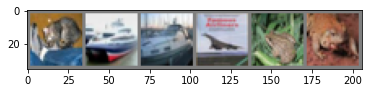

GroundTruth:  cat   ship  ship  plane frog  frog 


In [24]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(6)))

We check what the neural network thinks these examples above are:

In [25]:
net = CNN()
net.load_state_dict(torch.load(PATH))
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'for j in range(6)))

Predicted:  cat   ship  ship  plane frog  frog 


Everything is matching perfectly as expected as shown in the prediction below.

In [11]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'for j in range(4)))

Predicted:  cat   ship  ship  plane


In [12]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 55 %


The overall Accuracy peformance for each the 10 classes is 55% which is better. 

In [13]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 75 %
Accuracy of   car : 82 %
Accuracy of  bird : 41 %
Accuracy of   cat : 34 %
Accuracy of  deer : 36 %
Accuracy of   dog : 49 %
Accuracy of  frog : 75 %
Accuracy of horse : 48 %
Accuracy of  ship : 74 %
Accuracy of truck : 42 %


Carrying out predictions from the model using test data set. We create predict function to use the model in prediction and check_sample function to display the image being predicted, the predicted and desired class.

In [14]:
def predict(input):
    out = net(input.reshape(1, 3, 32, 32))
    _, pred = torch.max(out, dim=1)
    return classes[pred]

def check_sample(img_label_pair):
    imshow(img_label_pair[0])
    print("Predicted: " + predict(img_label_pair[0]))
    print("Desired output: " + classes[img_label_pair[1]])

Use the code below to test the model classification performance of 10000 cifar10 test dataset using testset[0..9999]

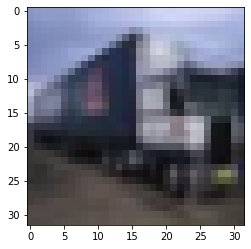

Predicted: truck
Desired output: truck


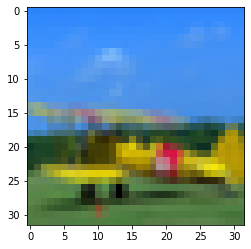

Predicted: plane
Desired output: plane


In [27]:
check_sample(testset[34])
check_sample(testset[44])